### First glance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#!unzip playground-series-s4e10.zip

In [ ]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
sample_submission = pd.read_csv('sample_submission.csv', index_col='id')

print(f'Last index of the train set: {train.index.max()}')
print(f'First index of the test set: {test.index.min()}')

train = pd.concat([train, test], axis=0)
train.tail()

Last index of the train set: 58644
First index of the test set: 58645


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,NaN
97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3,NaN
97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25,NaN
97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,NaN
97742,31,45000,RENT,6.0,DEBTCONSOLIDATION,B,19450,9.91,0.44,N,9,NaN


In [ ]:
train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,97743.000000,9.774300e+04,97743.000000,97743.000000,97743.000000,97743.000000,97743.000000,58645.000000
mean,27.557227,6.405189e+04,4.695436,9231.120663,10.671211,0.159372,5.820417,0.142382
std,6.033008,3.794080e+04,3.923469,5568.786009,3.028910,0.091668,4.046423,0.349445
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.574400e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


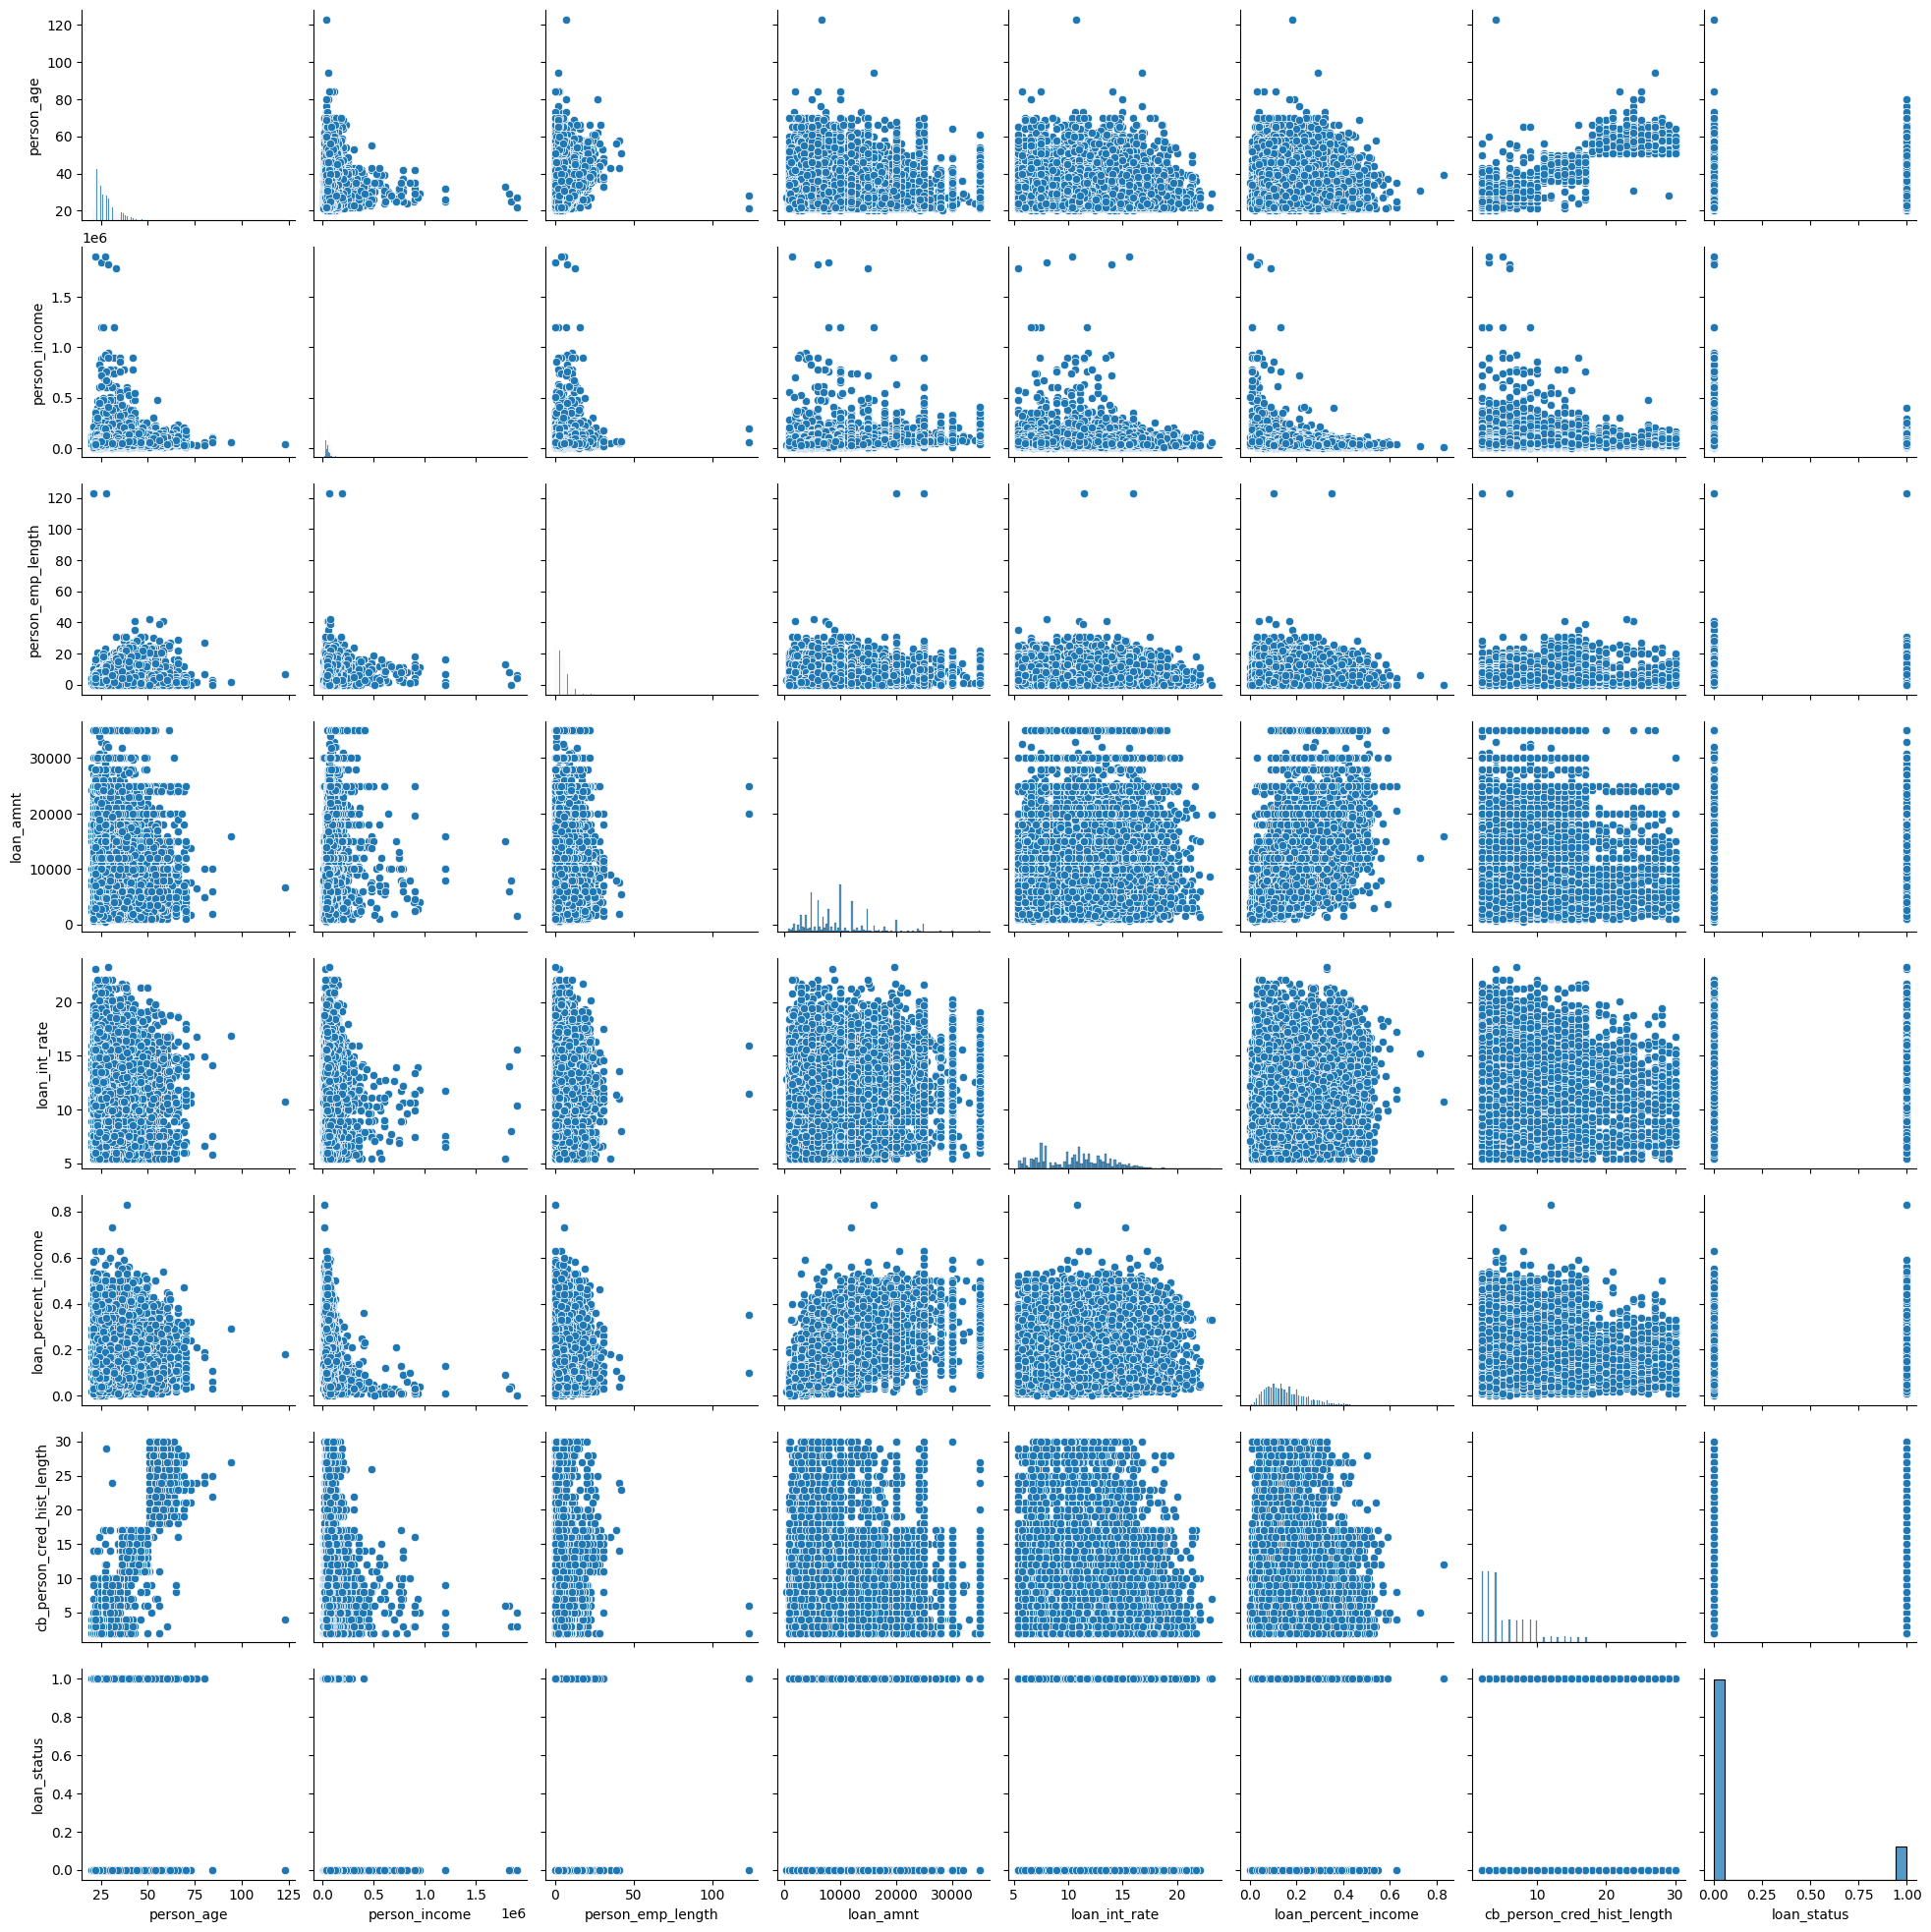

In [ ]:
sns.pairplot(train)

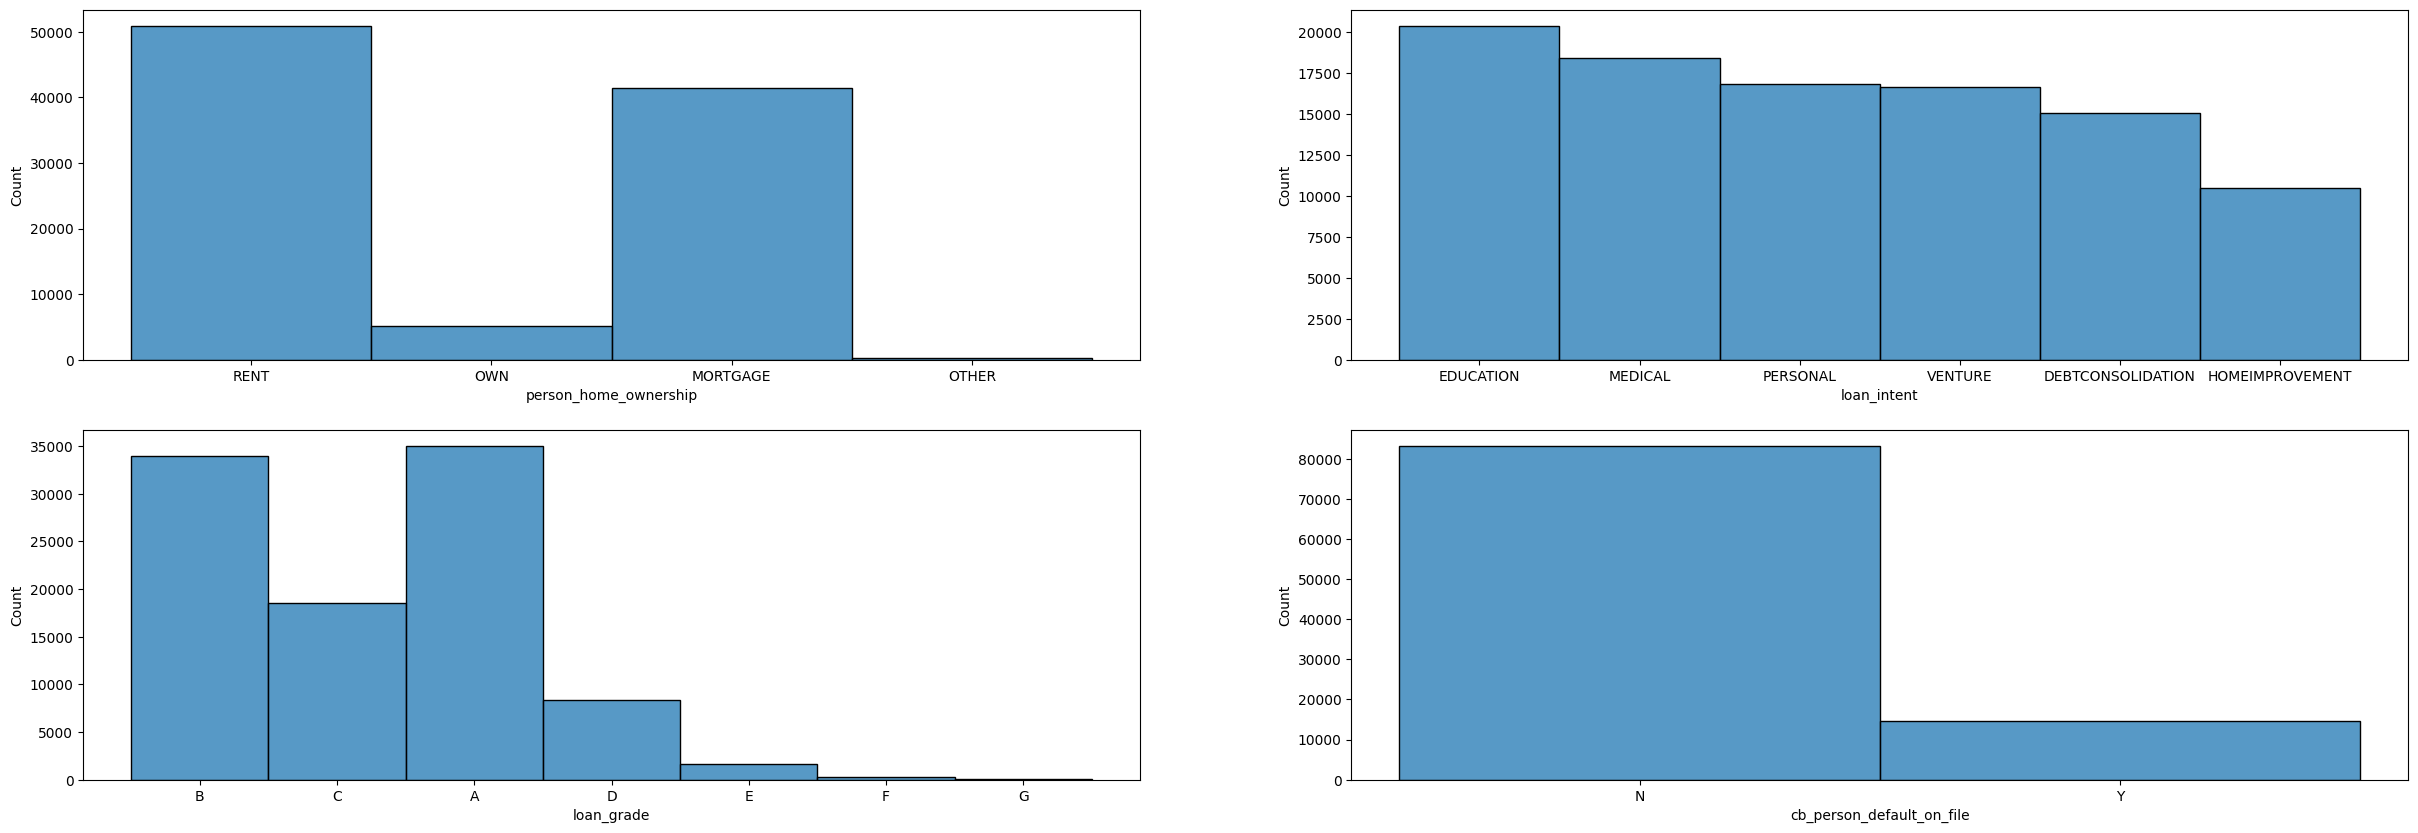

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))
sns.histplot(x=train['person_home_ownership'], ax=ax[0, 0])
sns.histplot(x=train['loan_intent'], ax=ax[0, 1])
sns.histplot(x=train['loan_grade'], ax=ax[1, 0])
sns.histplot(x=train['cb_person_default_on_file'], ax=ax[1, 1])

plt.subplots_adjust()
plt.show()

<Axes: xlabel='loan_status', ylabel='Count'>

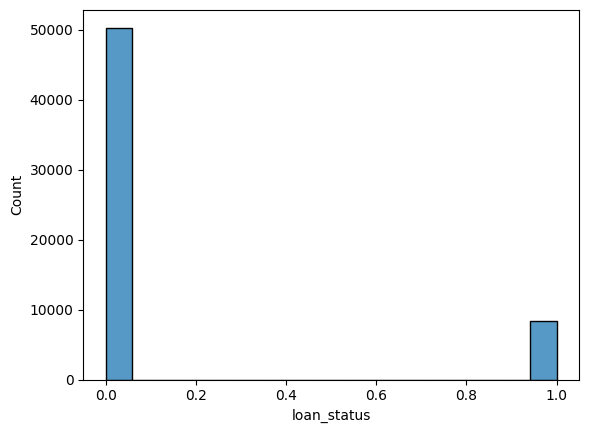

In [ ]:
sns.histplot(x=train['loan_status']) # the dataset is imbalanced

In [ ]:
for col in train.columns:
    print(f'{col}: {train[col].unique()}')

person_age: [ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123  63
  68  94]
person_income: [35000 56000 28800 ... 53376  5700 54480]
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
person_emp_length: [  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.  42.]
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
loan_amnt: [ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  2800  2000  5500 14400 15900
 12500  8000  2400 20000 14125  9600 17200  4200  7200 18000 23500  3550
  9800 24000 19500  6500 17500  4500 19750 28000 25000 18250  5200  

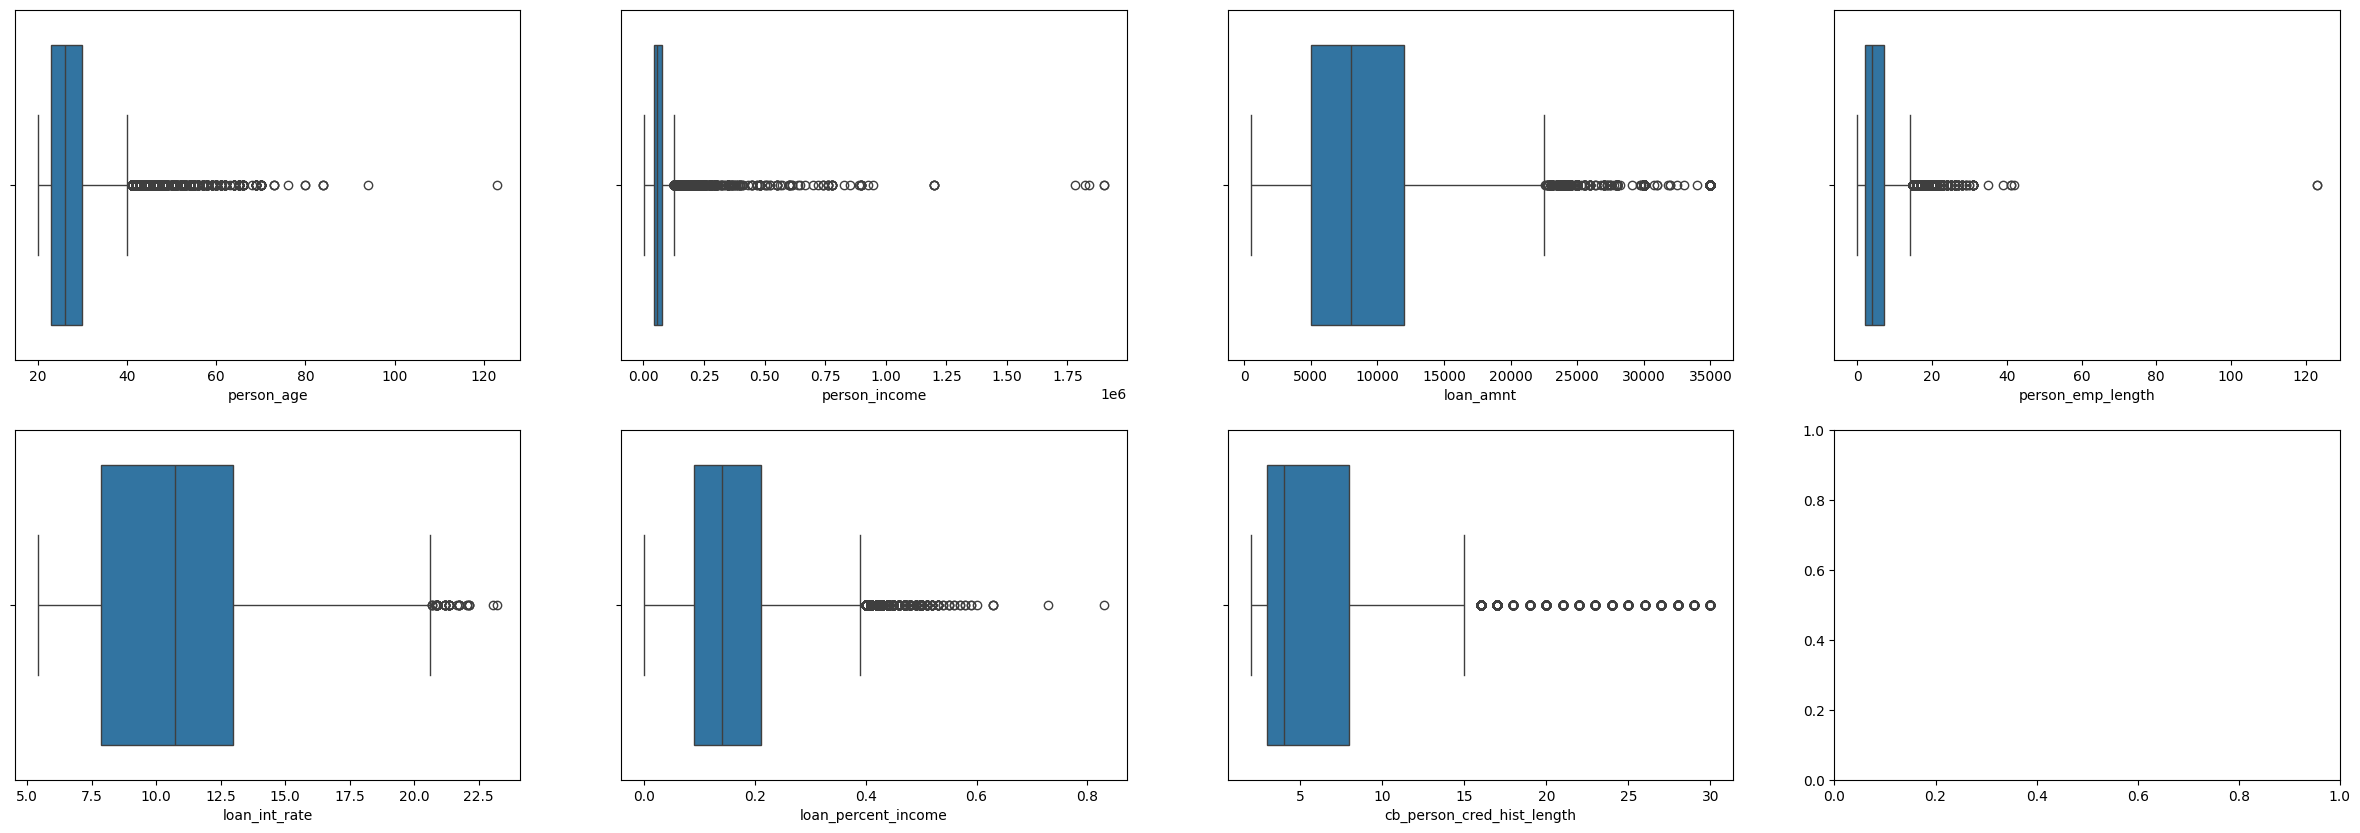

In [ ]:
numerical_columns = ['person_age', 'person_income', 'loan_amnt', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

fig, ax = plt.subplots(2, 4, figsize=(30, 10))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=train[col], ax=ax[i//4, i%4])

plt.subplots_adjust()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

print(train.shape)

for col in numerical_columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(train[(train[col] < lower_bound) | (train[col] > upper_bound)].shape)

for col in numerical_columns:
    train[col] = winsorize(train[col], limits=0.05)

(97743, 12)
(4066, 12)
(3953, 12)
(3433, 12)
(2052, 12)
(45, 12)
(2021, 12)
(3429, 12)


In [ ]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

train_with_dummies = pd.get_dummies(train, categorical_columns)

train_with_dummies = train_with_dummies.applymap(lambda x: 1 if x==True else 0 if x==False else x)

for col in train_with_dummies.columns:
    print(f'{col} has: {train_with_dummies[col].unique()}\n')

person_age has: [37 22 29 30 27 25 35 31 26 28 32 23 24 33 39 38 36 34]

person_income has: [35000 56000 28800 ... 64973 53376 54480]

person_emp_length has: [ 0.  6.  8. 12.  2.  9. 11.  5.  1.  3. 10.  4.  7.]

loan_amnt has: [ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  2800  5500 14400 15900 12500
  8000 20000 14125  9600 17200  4200  7200 18000  3550  9800 19500  6500
 17500  4500 19750 18250  5200  8400 18650  3600  7800  5400 13000 10800
 15250  8700 11000 16800 14500  6200  8500  6800  6400  8800  9250 16100
  3300  3650  7500 13750  6600  6250  6325  5600 17400  9200 13250  6625
  9500  3250  6725  4900  6450 11500  3100 10400 19200 14750  5250  5275
  5100  8200  7750 10500  9050  3350  2700  9975 11200  4600  7700  5300
 15500 12250  3800 18500 10625 10750 16500  5800 12375 15600  5175 19800
  7125 18400 15200  5025 11400  7775  8875 13200 11250  6700 10200 12600
 16750 19000  5825 13500 13350 11650 16700

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in train_with_dummies.columns:
    print(f'{col}: {is_numeric_dtype(train_with_dummies[col])}')

person_age: True
person_income: True
person_emp_length: True
loan_amnt: True
loan_int_rate: True
loan_percent_income: True
cb_person_cred_hist_length: True
loan_status: True
person_home_ownership_MORTGAGE: True
person_home_ownership_OTHER: True
person_home_ownership_OWN: True
person_home_ownership_RENT: True
loan_intent_DEBTCONSOLIDATION: True
loan_intent_EDUCATION: True
loan_intent_HOMEIMPROVEMENT: True
loan_intent_MEDICAL: True
loan_intent_PERSONAL: True
loan_intent_VENTURE: True
loan_grade_A: True
loan_grade_B: True
loan_grade_C: True
loan_grade_D: True
loan_grade_E: True
loan_grade_F: True
loan_grade_G: True
cb_person_default_on_file_N: True
cb_person_default_on_file_Y: True


In [ ]:
print(train_with_dummies.shape)
train_with_dummies.head()

(97743, 27)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
id,,,,,,,,,,,,,,,,,,,,,
0,37,35000,0.0,6000,11.49,0.17,14,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,22,56000,6.0,4000,13.35,0.07,2,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,29,28800,8.0,6000,8.90,0.21,10,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,30,70000,12.0,12000,11.11,0.17,5,0.0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,22,60000,2.0,6000,6.92,0.10,3,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
columns = train_with_dummies.columns.tolist()
columns.insert(len(columns), columns.pop(columns.index('loan_status')))
train_with_dummies = train_with_dummies[columns]
train_with_dummies

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
id,,,,,,,,,,,,,,,,,,,,,
0,37,35000,0.0,6000,11.49,0.17,14,0,0,0,...,0,1,0,0,0,0,0,1,0,0.0
1,22,56000,6.0,4000,13.35,0.07,2,0,0,1,...,0,0,1,0,0,0,0,1,0,0.0
2,29,28800,8.0,6000,8.90,0.21,10,0,0,1,...,1,0,0,0,0,0,0,1,0,0.0
3,30,70000,12.0,12000,11.11,0.17,5,0,0,0,...,0,1,0,0,0,0,0,1,0,0.0
4,22,60000,2.0,6000,6.92,0.10,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97738,22,31200,2.0,3000,10.37,0.10,4,1,0,0,...,0,1,0,0,0,0,0,1,0,NaN
97739,22,48000,6.0,7000,6.03,0.15,3,1,0,0,...,1,0,0,0,0,0,0,1,0,NaN
97740,39,60000,0.0,15000,7.51,0.25,14,1,0,0,...,1,0,0,0,0,0,0,1,0,NaN


<Axes: >

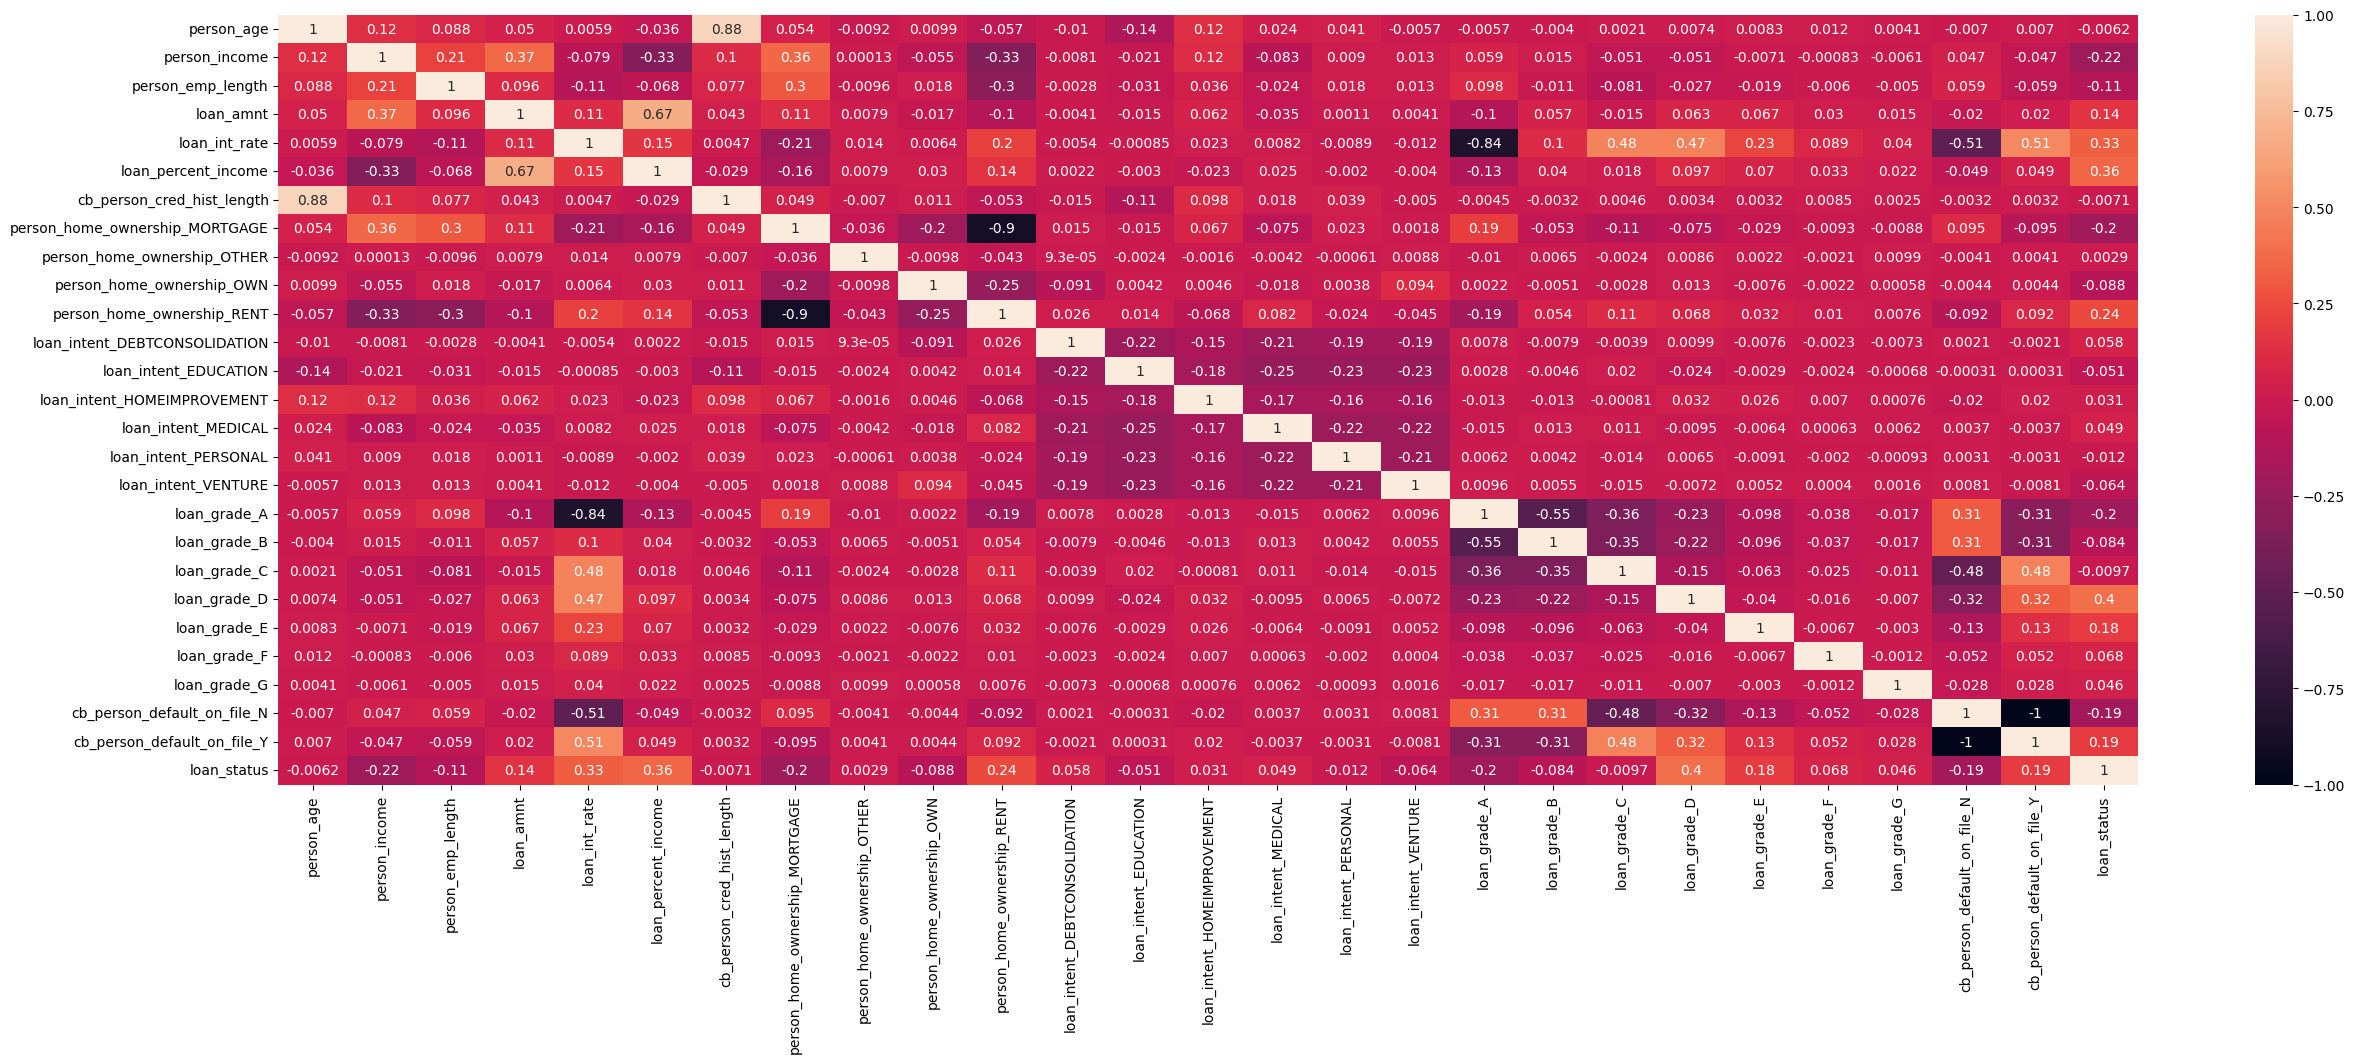

In [ ]:
fig = plt.figure(figsize=(30, 10))
sns.heatmap(train_with_dummies.corr(), annot=True)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_upsampled_downsampled.drop('loan_status', axis=1),
#                                                    df_upsampled_downsampled['loan_status'],
#                                                    test_size=0.2,
#                                                    random_state=42)

cut_index = 58645

# Create the training set
X_train = train_with_dummies.iloc[:cut_index].drop('loan_status', axis=1)
y_train = train_with_dummies.iloc[:cut_index]['loan_status']

# Create the test set
X_test = train_with_dummies.iloc[cut_index:].drop('loan_status', axis=1)
y_test = train_with_dummies.iloc[cut_index:]['loan_status']

In [ ]:
y_train

,loan_status
id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
58640,0.0
58641,1.0
58642,1.0


### Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
"""
def modeller(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'Classification report:\n{metrics.classification_report(y_test, y_pred)}')
    print(f'Confusion matrix:\n{metrics.confusion_matrix(y_test, y_pred)}')
    print(f'ROC AUC score: {metrics.roc_auc_score(y_test, y_pred)}')
    print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')
    print(f'Precision score: {metrics.precision_score(y_test, y_pred)}')
    print(f'Recall score: {metrics.recall_score(y_test, y_pred)}')

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]

for model in models:
  print('\n')
  print(f'Model: {model}')
  modeller(model, X_train, X_test, y_train, y_test)
  """

In [ ]:
model = RandomForestClassifier(n_estimators=1000, max_depth=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(data={'loan_status': y_pred}, index=X_test.index)
df.head()

# Save to CSV
df.to_csv('submission.csv')

In [ ]:
print(df.columns)
print(df.head())
print(df.shape)

Index(['loan_status'], dtype='object')
       loan_status
id                
58645          1.0
58646          0.0
58647          1.0
58648          0.0
58649          0.0
(39098, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Assuming X and y are your full training data
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grids
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs']},
    'DecisionTreeClassifier': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'GaussianNB': {}  # No hyperparameters to tune for GaussianNB
}

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

# Function for training and evaluating the models
def modeller(model, params, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate on the validation set
    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, "predict_proba") else None

    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Accuracy score: {accuracy_score(y_val, y_pred)}')
    print(f'Classification report:\n{classification_report(y_val, y_pred)}')
    print(f'Confusion matrix:\n{confusion_matrix(y_val, y_pred)}')
    if y_proba is not None:
        print(f'ROC AUC score: {roc_auc_score(y_val, y_proba)}')
    print(f'F1 score: {f1_score(y_val, y_pred)}')
    print(f'Precision score: {precision_score(y_val, y_pred)}')
    print(f'Recall score: {recall_score(y_val, y_pred)}')

# Train and evaluate each model
for name, model in models.items():
    print(f'\nModel: {name}')
    params = param_grids[name] if name in param_grids else {}
    modeller(model, params, X_train_full, y_train_full, X_val, y_val)

# Once you've found the best model and tuned hyperparameters, use it on the full training set for predictions:
best_model = RandomForestClassifier(n_estimators=100, max_depth=10)  # Example of chosen best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Save to submission file
#df = pd.DataFrame(data={'loan_status': y_pred}, index=X_test.index)
#df.to_csv('submission.csv')


Model: LogisticRegression
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy score: 0.8820871344530651
Classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93     10087
         1.0       0.67      0.31      0.42      1642

    accuracy                           0.88     11729
   macro avg       0.78      0.64      0.68     11729
weighted avg       0.87      0.88      0.86     11729

Confusion matrix:
[[9837  250]
 [1133  509]]
ROC AUC score: 0.845760277787874
F1 score: 0.42399000416493127
Precision score: 0.6706192358366272
Recall score: 0.3099878197320341

Model: DecisionTreeClassifier
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Accuracy score: 0.945690169664933
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     10087
         1.0       0.89      0.70      0.78      1642

    accuracy                         

KeyboardInterrupt: 

### Draft